# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


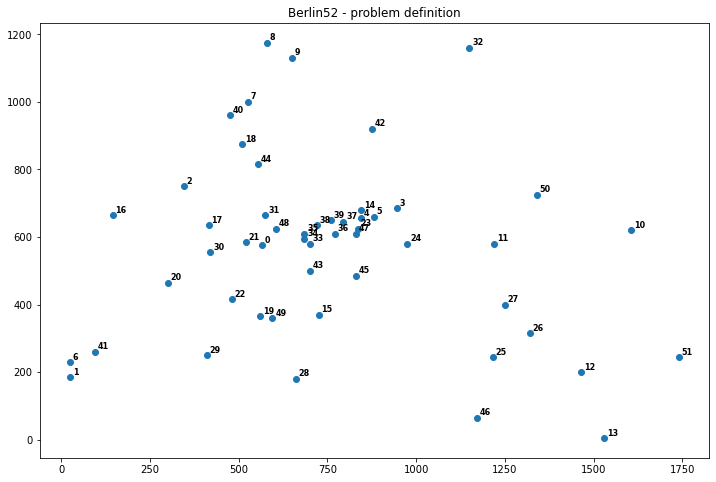

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

<Figure size 864x576 with 0 Axes>

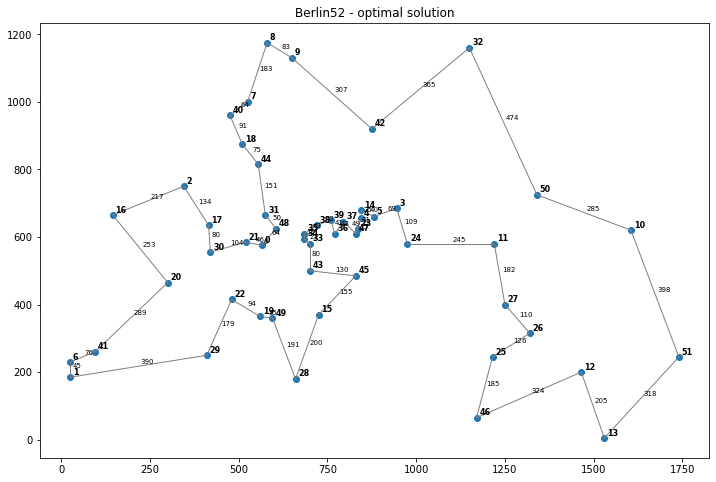

In [4]:
from matplotlib.lines import Line2D

route = p

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - optimal solution')

plt.show()

## Objective function

In [73]:
def tsp_objective_function(p):
    s = 0.0
    for i in range(n):
        s += A[p[i-1], p[i]]
    return s

In [6]:
print(tsp_objective_function(p), p)

7544.365901904086 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


## Random Sampling

In [7]:
def rand_perm(n):
    return np.random.permutation(n)

In [8]:
def RS():
    t0 = time.time()

    T = 1000000

    permutations = np.empty((T, n), dtype=np.int64)
    costs = np.zeros(T)
    for i in range(T):
        permutations[i, :] = rand_perm(n)
        costs[i] = tsp_objective_function(permutations[i, :])

    print("r_a time:", time.time() - t0)

    p = permutations[costs.argmin(), :]
    #print(tsp_objective_function(p), p)
    return tsp_objective_function(p), costs

r_a time: 28.459882497787476


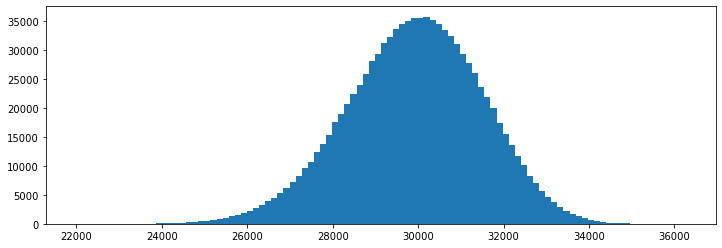

29912.399764923037 1579.5879942972251


In [129]:
c_min, costs = RS()
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [9]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [10]:
def SA():
    T = 500000
    radius = 1
    alpha = 1.0

    t0 = time.time()

    p = np.random.permutation(n)
    p_cost = tsp_objective_function(p)
    costs = np.zeros(T)
    for t in range(T):
        q = random_neighbor(p, radius)
        q_cost = tsp_objective_function(q)
        if(q_cost < p_cost):
            p, p_cost = q, q_cost
        elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
            p, p_cost = q, q_cost
        costs[t] = p_cost

    print("s_a time:", time.time() - t0)#, costs.min())
    return costs.min(), costs

s_a time: 23.706228733062744
9293.48842775829


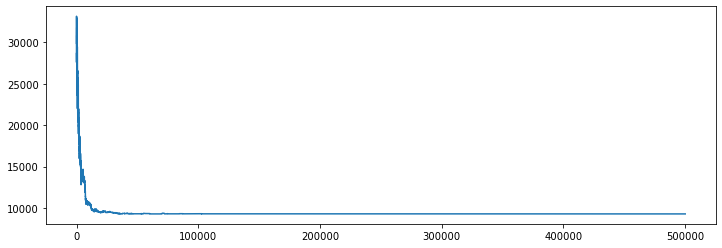

In [125]:
c_min, costs = SA()
print(c_min)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX

### a)

In [83]:
def PMX(ind1, ind2):
    a = np.random.choice(len(ind1), 2, False)
    i, j = a.min(), a.max()
    p1 = ind1[i:j+1]
    p2 = ind2[i:j+1]
    d_p1 = {p1[k] : p2[k] for k in range(len(p1))}
    d_p2 = {p2[k] : p1[k] for k in range(len(p2))}
    child1 = ind1.copy()
    child2 = ind2.copy()
    
    child1[i:j+1] = p2
    child2[i:j+1] = p1
    
    for k in range(i):
        while child1[k] in d_p2:
            child1[k] = d_p2[child1[k]]
        while child2[k] in d_p1:
            child2[k] = d_p1[child2[k]]
            
    for k in range(j+1, len(ind1)):
        s = 0
        while child1[k] in d_p2:
            child1[k] = d_p2[child1[k]]
            
        while child2[k] in d_p1:
            child2[k] = d_p1[child2[k]]
        
    return child2, child1

In [84]:
def random_transposition(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    p[i], p[j] = p[j], p[i]
    return p

In [85]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

In [102]:
def SGA(F, number_of_iterations = 250, return_chromosome = False):
    population_size = 500
    chromosome_length = n
    number_of_offspring = population_size
    crossover_probability = 0.95
    mutation_probability = 0.25

    time0 = time.time()

    best_objective_value = np.Inf
    best_chromosome = np.zeros((1, chromosome_length))

    # generating an initial population
    current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
    for i in range(population_size):
        current_population[i, :] = np.random.permutation(chromosome_length)

    # evaluating the objective function on the current population
    objective_values = np.zeros(population_size)
    for i in range(population_size):
        objective_values[i] = tsp_objective_function(current_population[i, :])
    
    costs = np.zeros((number_of_iterations))
    for t in range(number_of_iterations):

        # selecting the parent indices by the roulette wheel method
        fitness_values = objective_values.max() - objective_values
        if fitness_values.sum() > 0:
            fitness_values = fitness_values / fitness_values.sum()
        else:
            fitness_values = np.ones(population_size) / population_size
        parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

        # creating the children population
        children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
        for i in range(int(number_of_offspring/2)):
            if np.random.random() < crossover_probability:
                children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1], :].copy())
            else:
                children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        if np.mod(number_of_offspring, 2) == 1:
            children_population[-1, :] = current_population[parent_indices[-1], :]

        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = F(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
        
        costs[t] = objective_values[0]
        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
    
        #print(best_chromosome)
        #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    print("s_g_a time:", time.time() - time0)
    if return_chromosome:
        return best_objective_value, costs, best_chromosome
    return best_objective_value, costs

In [133]:
rs_data = []
sa_data = []
sga_data = []

for i in range(10):
    rs_data.a
        # mutating the children population
        for i in range(number_of_offspring):
            if np.random.random() < mutation_probability:
                children_population[i, :] = F(children_population[i, :])

        # evaluating the objective function on the children population
        children_objective_values = np.zeros(number_of_offspring)
        for i in range(number_of_offspring):
            children_objective_values[i] = tsp_objective_function(children_population[i, :])

        # replacing the current population by (Mu + Lambda) Replacement
        objective_values = np.hstack([objective_values, children_objective_values])
        current_population = np.vstack([current_population, children_population])

        I = np.argsort(objective_values)
        current_population = current_population[I[:population_size], :]
        objective_values = objective_values[I[:population_size]]
        
        costs[t] = objective_values[0]
        # recording some statistics
        if best_objective_value > objective_values[0]:
            best_objective_value = objective_values[0]
            best_chromosome = current_population[0, :]
    
        #print(best_chromosome)
        #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))
    print("s_g_a time:", time.time() - time0)
    if return_chromosome:
        return best_objective_value, costs, best_chromosome
    return best_objective_value, costsppend(RS()[0])
    
    sa_data.append(SA()[0])
    
    sga_data.append(SGA(reverse_sequence_mutation)[0])
    

r_a time: 28.804958820343018
s_a time: 26.957387924194336
s_g_a time: 8.588899850845337
r_a time: 34.27498269081116
s_a time: 27.17601728439331
s_g_a time: 8.566708087921143
r_a time: 33.51157879829407
s_a time: 26.465065240859985
s_g_a time: 8.658239364624023
r_a time: 32.045647382736206
s_a time: 27.005717754364014
s_g_a time: 8.734022378921509
r_a time: 32.31263518333435
s_a time: 26.082958459854126
s_g_a time: 8.27152967453003
r_a time: 30.569205284118652
s_a time: 24.841108798980713
s_g_a time: 8.030980348587036
r_a time: 31.231955528259277
s_a time: 24.486201286315918
s_g_a time: 7.834097146987915
r_a time: 29.41884422302246
s_a time: 24.13050413131714
s_g_a time: 7.87902307510376
r_a time: 30.878761053085327
s_a time: 28.356796503067017
s_g_a time: 9.13364052772522
r_a time: 33.42675709724426
s_a time: 29.438392400741577
s_g_a time: 8.820958852767944


### b)

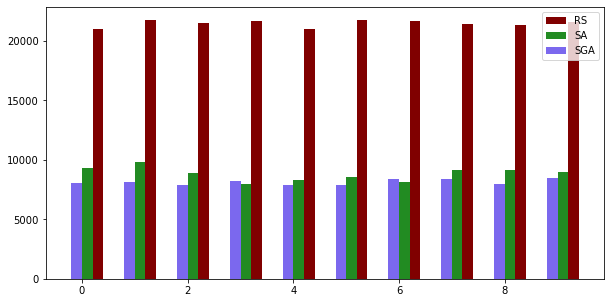

RS_min: 21037.71749454497
SA_min: 7982.571011664195
SGA_min: 7852.501670616868


In [182]:
plt.figure(figsize=(10,5))
plt.bar(np.arange(10) + 0.2, rs_data, color = 'maroon', label = 'RS', width = 0.2, align = 'edge')
plt.bar(np.arange(10), sa_data, color = 'forestgreen', label = "SA", width = 0.2, align = 'edge')
plt.bar(np.arange(10), sga_data, color = 'mediumslateblue', label = "SGA", width = -0.2, align = 'edge')
plt.legend()
plt.show()
print("RS_min:", min(rs_data))
print("SA_min:", min(sa_data))
print("SGA_min:", min(sga_data))

### c)

s_g_a time: 7.634942531585693
8641.35712957723


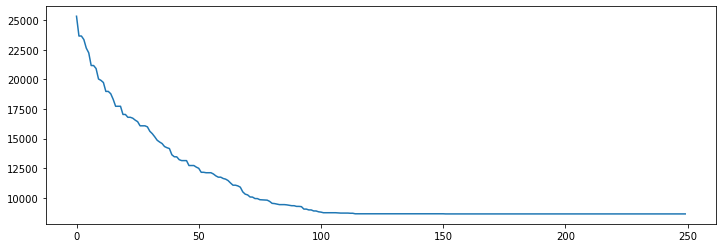

In [189]:
c_min, costs = SGA(reverse_sequence_mutation)
print(c_min)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

### d)

s_g_a time: 7.631361484527588
9029.127977391898


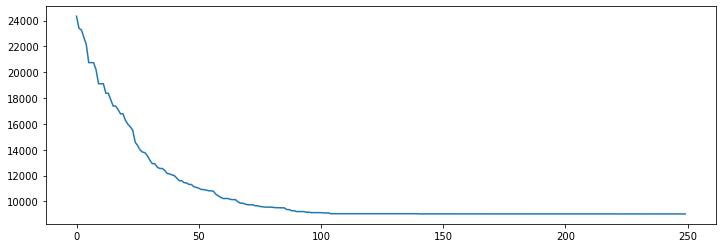

In [190]:
c_min, costs = SGA(random_transposition)
print(c_min)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

s_g_a time: 7.741682052612305
9687.061085723026


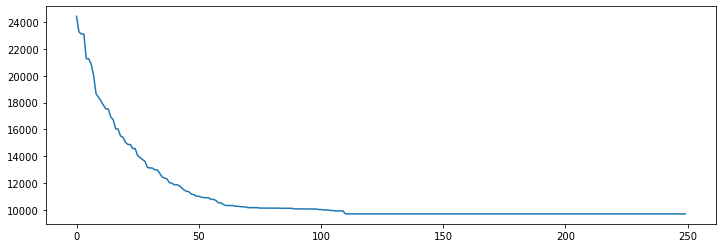

In [191]:
c_min, costs = SGA(random_transposition)
print(c_min)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

s_g_a time: 7.55325984954834
9517.572320620366


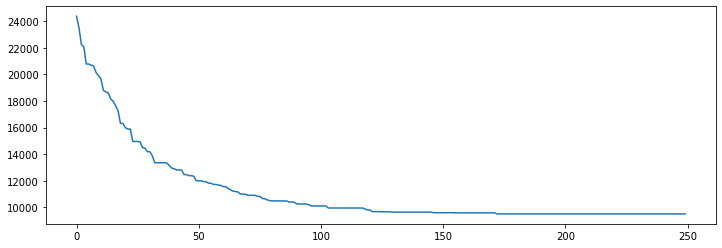

In [192]:
c_min, costs = SGA(random_transposition)
print(c_min)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

### e)

In [188]:
def load_data(file):
    ans = {}
    last = ""
    with open(file) as f:
        for line in f:
            tmp = line.strip().split()
            if tmp[0] == 'NAME:':
                ans['name'] = tmp[1]
                last = tmp[0]
            
            elif tmp[0] == "DIMENSION:":
                ans['n'] = int(tmp[1])
                last = tmp[0]
                
            elif tmp[0] == "DIMENSION":
                ans['n'] = int(tmp[2]) # the files with opt tour are different....
                last = tmp[0]
            
            elif tmp[0] == "EDGE_WEIGHT_SECTION":
                last = tmp[0]
            
            elif tmp[0] == "DISPLAY_DATA_SECTION" or tmp[0] == "NODE_COORD_SECTION":
                last = tmp[0]
            
            #in case we are reading the optimal tour file
            elif tmp[0] == "TOUR_SECTION": 
                last = tmp[0]
            
            elif tmp[0] == "EOF":
                last = tmp[0]
                break
                
            else:
                if last == "EDGE_WEIGHT_SECTION":
                    tmp = np.array( list ( map ( int, tmp ) ) )
                    #if our distance matrix is not fully given
                    if len(tmp) < 29: 
                        tmp = np.hstack((np.zeros( 29 - len(tmp)), tmp))
                        
                    if 'dist' in ans:
                        ans['dist'] = np.vstack((ans['dist'], tmp))
                    else:
                        ans['dist'] = tmp
                    
                if last == "DISPLAY_DATA_SECTION" or last == "NODE_COORD_SECTION":
                    tmp = list ( map ( float, tmp[1:] ) )
                    if 'coords' in ans:
                        ans['coords'] = np.vstack((ans['coords'], np.array(tmp)) )
                    else:
                        ans['coords'] = np.array(tmp)
                
                if last == "TOUR_SECTION" and tmp[0] != '-1':
                    tmp = int(tmp[0])
                    if 'p' in ans:
                        ans['p'].append(tmp - 1)
                    else:
                        ans['p'] = [tmp - 1]
    return ans
            
        

### BAYG29, 250 iterations

In [167]:
data = load_data("bayg29.tsp.txt")
n = data['n']
print('Problem size: %d' % n)

coords = data['coords']

A = np.vstack((data['dist'], np.zeros(n))) #distance for n point aren't given, we have to add one row
#the distances are given in upper triangular form, so to have complete matrix, we should add to A, A.T
A += A.T

opt = load_data("bayg29.opt.tour.txt")
p = opt['p']

print(tsp_objective_function(p), ' -> optimal solution:\n', p)

Problem size: 29
1610.0  -> optimal solution:
 [0, 27, 5, 11, 8, 25, 2, 28, 4, 20, 1, 19, 9, 3, 14, 17, 13, 16, 21, 10, 18, 24, 6, 22, 7, 26, 15, 12, 23]


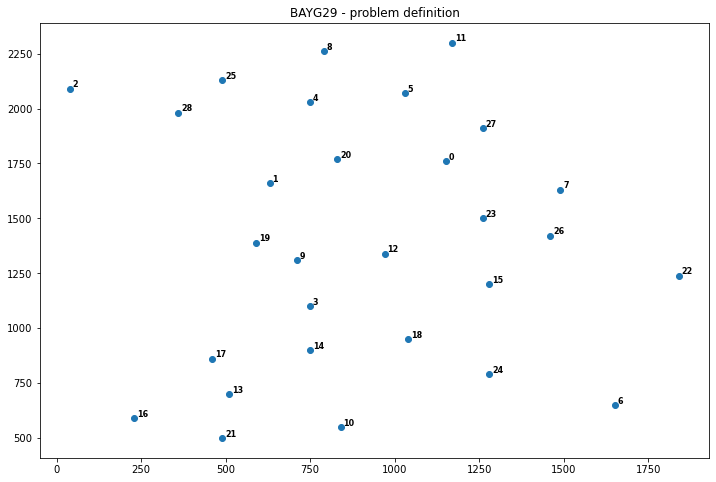

In [168]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('BAYG29 - problem definition')

plt.show()

s_g_a time: 3.814488410949707
1658.0
[ 3  9 19 12 15 23 20  1 28  2 25  4  8 11  5 27  0  7 26 22  6 24 18 10
 21 16 13 17 14]


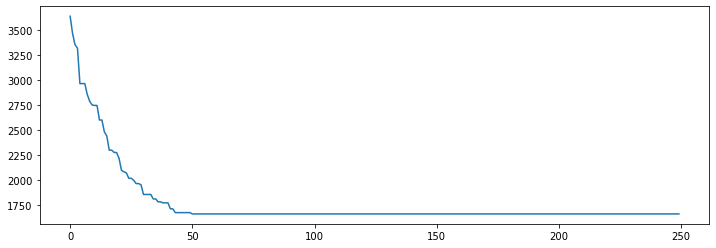

In [169]:
c_min, costs, best_chromo = SGA(reverse_sequence_mutation, return_chromosome = True)
print(c_min)
print(best_chromo)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

### BAYS29, 250 iterations

In [170]:
data = load_data("bays29.tsp.txt")
n = data['n']
print('Problem size: %d' % n)

coords = data['coords']

A = data['dist']

opt = load_data("bays29.opt.tour.txt")
p = opt['p']

print(tsp_objective_function(p), ' -> optimal solution:\n', p)

Problem size: 29
2020.0  -> optimal solution:
 [0, 27, 5, 11, 8, 4, 25, 28, 2, 1, 19, 9, 3, 14, 17, 16, 13, 21, 10, 18, 24, 6, 22, 26, 7, 23, 15, 12, 20]


s_g_a time: 4.20939302444458
2020.0
[ 1 19  9  3 14 17 16 13 21 10 18 24  6 22 26  7 23 15 12 20  0 27  5 11
  8  4 25 28  2]


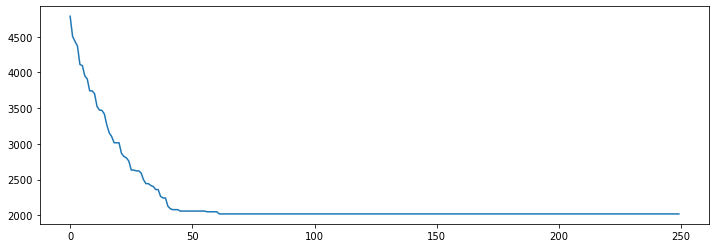

In [185]:
c_min, costs, best_chromo = SGA(reverse_sequence_mutation, return_chromosome = True)
print(c_min)
print(best_chromo)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

### KROA100, 1000 iterations

In [189]:
data = load_data("kroA100.tsp.txt")
n = data['n']
print('Problem size: %d' % n)

coords = data['coords']

# compute a distance matrix
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

opt = load_data("kroA100.opt.tour.txt")
p = opt['p']

print(tsp_objective_function(p), ' -> optimal solution:\n', p)

Problem size: 100
21285.44318157108  -> optimal solution:
 [0, 46, 92, 27, 66, 57, 60, 50, 86, 24, 80, 68, 63, 39, 53, 1, 43, 49, 72, 67, 84, 81, 94, 12, 75, 32, 36, 4, 51, 77, 95, 38, 29, 47, 99, 40, 70, 13, 2, 42, 45, 28, 33, 82, 54, 6, 8, 56, 19, 11, 26, 85, 34, 61, 59, 76, 22, 97, 90, 44, 31, 10, 14, 16, 58, 73, 20, 71, 9, 83, 35, 98, 37, 23, 17, 78, 52, 87, 15, 93, 21, 69, 65, 25, 64, 3, 96, 55, 79, 30, 88, 41, 7, 91, 74, 18, 89, 48, 5, 62]


s_g_a time: 55.884358167648315
33313.909490000246
[111 106 108   5  53  74 154 182  21 133   7 128 145 102 142  16  24  89
  33  57 140 170 199  97 113  87 147  27  38 129  70  37  55 151 177 195
   4 138  71  82  61  49 184 167 172  22 143 149  90  93  94  85 136 104
  42 132 175 112 194 181  75  69 101 163 139  20 153  72   2  58  40  88
  29  67 168  34   1 180 124 160 150 186  79  76 157 166 192 127  59  68
 188 130 179 141 107 191  13  35  56  73  99 155  32  44 196  80  96 103
 164 125  86  95 165  47 118  18  91   9 174  98 148 105  92  48 109  28
  17 189  65 152  43 187 115  83  10  51 169 121 193  50  62 178  15 117
  36 183 123 137   8  77  81   6 198  25 135  60  31  23 158 110 131   0
  52 114 116 173 120 171  45  11 162   3 100 146  39  26 197 190  84 144
 122  14  78  12 176 159 161  63  19  54  66  64  30  46 156 119 185  41
 134 126]


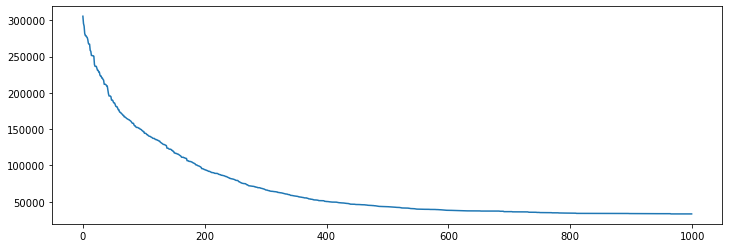

In [197]:
c_min, costs, best_chromo = SGA(reverse_sequence_mutation, return_chromosome = True, number_of_iterations = 1000)
print(c_min)
print(best_chromo)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

### KROA150, 2000 iterations

In [192]:
data = load_data("kroA150.tsp.txt")
n = data['n']
print('Problem size: %d' % n)

coords = data['coords']

# compute a distance matrix
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

Problem size: 150


s_g_a time: 112.26632404327393
32939.939067168496
[138  49  94  90 149 143  22 172 167 184  61  82  71 129  38  27  37  70
 195 177 151  55 147  87 199 170 140  57  33  89 142 102  97 113 128 145
  24  16   7 133  21 182 154  74  53   5 108 106 156 111 126 185 134  41
  54  63  19 159  78  12 176 161  66 119  46  30  64 157 192 127  59 146
  39 131 190  26 197 122  14 144  84   0  52 114 116 110 120 173 158  23
 171  45  11  48  17 109  28 183  60 135  31  25 198   6  81  77   8 137
 123  36 117  15  50 193 121 169  83  10  51  86 125  95 165 164 103  96
  80 155  99  32  44 196  47 115 187  62  43 152  65 178 189 118  91   9
 174  98  18 148 105  92 162   3 100 191  13 107  35  56  73 179 130 188
 141  68   2  72  58  40 166  76  79 186 150 160 124 180   1  34 168  67
  29  88 153  20 139 163 101  69  75  93 181 194 112 175 132 136  42 104
   4  85]


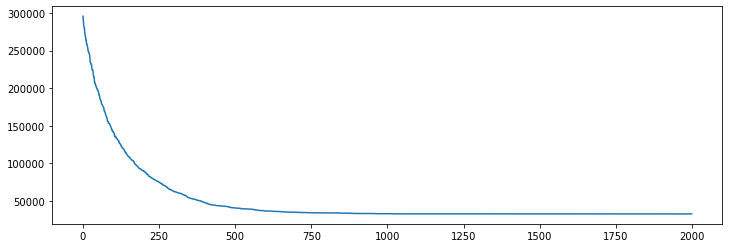

In [198]:
c_min, costs, best_chromo = SGA(reverse_sequence_mutation, return_chromosome = True, number_of_iterations = 2000)
print(c_min)
print(best_chromo)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

### KROA200, 3000 iterations

In [194]:
data = load_data("kroA200.tsp.txt")
n = data['n']
print('Problem size: %d' % n)

coords = data['coords']

# compute a distance matrix
A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())

Problem size: 200


s_g_a time: 162.97692108154297
33693.046488993925
[ 48  17 109  28 183 171  23  31 135  60  25 198   6  81  77   8 137 123
  36 117 178  15  50 193  62 187 115 121 169  83  10  51  86 125  95 165
 164 103  96  80  32  99 155 179 130 141 107  68 188  72   2  58  88  40
  59 192 127 166  29  67   1  34 168 139 153  20 163  22 172 167 149  90
  93 143 101  69  75 181 194 112 175 132 136  42 104   4 195 177 151  55
  27 147  87 113  97 199 170 140  57 102  33  89 142  24  16 145 128  82
  61  71 129  38  37  70 138  85  94  49 184  53  74 133  21   7 182 154
 106 156 108   5 186 150 124 180 160  76 157  79  64  66  30  46 119 111
 126 185 134  41  54  19  63 161 159  78 176  12  14 122 197  26 190 144
  84 131   0  52 110 114 116 158 173 120  45  11  39 146 100   3 191  13
  98  18  91   9 174  35  56  73  44 196 118  47  43 152  65 189 148 105
  92 162]


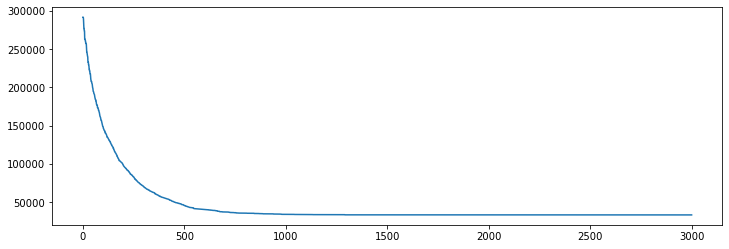

In [199]:
c_min, costs, best_chromo = SGA(reverse_sequence_mutation, return_chromosome = True, number_of_iterations = 3000)
print(c_min)
print(best_chromo)
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()